In [3]:
import numpy as np
from scipy.stats import multivariate_normal
import pickle
from mallows import MallowsModel
from LabelRanking import *

In [42]:
d = 100 # data dimension
k = 5  # number of labels

noise_type = 'additive'

if d == 10: dir = 'SFN'
if d == 100: dir = 'MFN'
if d == 1000: dir = 'LFN'

In [43]:
with open(f'datasets/{dir}/W.pickle', 'rb') as handle: W = pickle.load(handle)
with open(f'datasets/{dir}/X_train.pickle', 'rb') as handle: X_train = pickle.load(handle)
with open(f'datasets/{dir}/P_train.pickle', 'rb') as handle: P_train = pickle.load(handle)
with open(f'datasets/{dir}/X_test.pickle', 'rb') as handle: X_test = pickle.load(handle)
with open(f'datasets/{dir}/P_test.pickle', 'rb') as handle: P_test = pickle.load(handle)

### Create SFN Additive alpha

In [44]:
variances = [0]

# FOR SFN

# for i in range(4): variances.append(variances[-1] + 0.002)
# for i in range(5): variances.append(variances[-1] + 0.005)
# for i in range(5): variances.append(variances[-1] + 0.001)
# for i in range(5): variances.append(variances[-1] + 0.002)
# for i in range(5): variances.append(variances[-1] + 0.0035)
# for i in range(5): variances.append(variances[-1] + 0.006)
# for i in range(5): variances.append(variances[-1] + 0.01)
# for i in range(5): variances.append(variances[-1] + 0.02)
# for i in range(5): variances.append(variances[-1] + 0.09)
# for i in range(3): variances.append(variances[-1] + 0.7)
# variances.append(variances[-1] + 2)
# variances.append(variances[-1] + 20)

for i in range(4): variances.append(variances[-1] + 0.002)
for i in range(5): variances.append(variances[-1] + 0.007)
for i in range(5): variances.append(variances[-1] + 0.015)
for i in range(5): variances.append(variances[-1] + 0.025)
for i in range(5): variances.append(variances[-1] + 0.05)
for i in range(5): variances.append(variances[-1] + 0.08)
for i in range(5): variances.append(variances[-1] + 0.1)
for i in range(5): variances.append(variances[-1] + 0.3)
for i in range(5): variances.append(variances[-1] + 0.7)
for i in range(3): variances.append(variances[-1] + 0.9)
variances.append(variances[-1] + 2)
variances.append(variances[-1] + 20)

for i, variance in enumerate(variances):
  if variance == 0:
    P_train_noisy = P_train
  else:
    noise = multivariate_normal(mean=np.zeros(k), cov=variance*np.identity(k)).rvs(size=len(X_train))
    R_train_noisy = LinearSortingFunction(W, X_train, noise)
    P_train_noisy = np.argsort(R_train_noisy, axis=1)
  alpha = np.mean([not np.array_equal(x, y) for x, y in zip(P_train, P_train_noisy)])
  print(alpha)
  data = dict(alpha=alpha, variance=variance, P_train_noisy=P_train_noisy)
  with open(f'datasets/{dir}/{noise_type}/alpha_{i}.pickle', 'wb') as handle: pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

0.0
0.0475
0.066
0.083
0.0916
0.1276
0.1542
0.1707
0.1951
0.2019
0.233
0.256
0.2729
0.3018
0.3105
0.3339
0.3572
0.3751
0.3944
0.4115
0.445
0.4629
0.4789
0.5102
0.5238
0.5463
0.5759
0.5969
0.6093
0.6236
0.6491
0.6627
0.6862
0.682
0.7093
0.7298
0.7581
0.7789
0.7887
0.8082
0.8417
0.852
0.8714
0.8797
0.8915
0.9028
0.912
0.9113
0.926
0.9642


### Create SFN Additive beta

In [45]:
variances = [0]

# for i in range(9): variances.append(variances[-1] + 0.00009)
# for i in range(10): variances.append(variances[-1] + 0.0004)
# for i in range(10): variances.append(variances[-1] + 0.0009)
# for i in range(10): variances.append(variances[-1] + 0.001)
# for i in range(10): variances.append(variances[-1] + 0.004)

# For SFN

# for i in range(4): variances.append(variances[-1] + 0.003)
# for i in range(5): variances.append(variances[-1] + 0.012)
# for i in range(5): variances.append(variances[-1] + 0.025)
# for i in range(5): variances.append(variances[-1] + 0.04)
# for i in range(5): variances.append(variances[-1] + 0.08)
# for i in range(5): variances.append(variances[-1] + 0.15)
# for i in range(5): variances.append(variances[-1] + 0.3)
# for i in range(5): variances.append(variances[-1] + 0.8)
# for i in range(5): variances.append(variances[-1] + 2)
# for i in range(3): variances.append(variances[-1] + 10)
# variances.append(variances[-1] + 20)
# variances.append(variances[-1] + 40)

for i in range(4): variances.append(variances[-1] + 0.03)
for i in range(5): variances.append(variances[-1] + 0.12)
for i in range(5): variances.append(variances[-1] + 0.25)
for i in range(5): variances.append(variances[-1] + 0.4)
for i in range(5): variances.append(variances[-1] + 0.8)
for i in range(5): variances.append(variances[-1] + 1.5)
for i in range(5): variances.append(variances[-1] + 3)
for i in range(5): variances.append(variances[-1] + 10)
for i in range(5): variances.append(variances[-1] + 20)
for i in range(3): variances.append(variances[-1] + 100)
variances.append(variances[-1] + 1000)
variances.append(variances[-1] + 3000)

for i, variance in enumerate(variances[::-1]):
  if variance == 0:
    P_train_noisy = P_train
  else:
    noise = multivariate_normal(mean=np.zeros(k), cov=variance*np.identity(k)).rvs(size=len(X_train))
    R_train_noisy = LinearSortingFunction(W, X_train, noise)
    P_train_noisy = np.argsort(R_train_noisy, axis=1)
  beta = mean_KTcorrelation(P_train, P_train_noisy)
  print(beta)
  data = dict(beta=beta, variance=variance, P_train_noisy=P_train_noisy)
  with open(f'datasets/{dir}/additive/beta_{i}.pickle', 'wb') as handle: pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

0.035660000000000025
0.04789999999999994
0.08719999999999994
0.09724
0.11484000000000005
0.14244
0.14398
0.15307999999999988
0.16774
0.18518000000000012
0.1991400000000001
0.21946
0.22743999999999998
0.25727999999999995
0.27788
0.3121400000000001
0.32275999999999994
0.3339000000000001
0.36432
0.38244
0.40523999999999993
0.42446000000000006
0.44118
0.46486000000000005
0.48940000000000006
0.50768
0.52274
0.5514
0.56814
0.5962799999999999
0.62252
0.63818
0.65096
0.66832
0.69012
0.71334
0.7317
0.75048
0.76762
0.7955
0.82158
0.83646
0.8509
0.8703799999999999
0.8941
0.92564
0.93556
0.94662
0.96128
1.0


### Create SFN Mallows alpha

In [46]:
thetas = [0]

# for i in range(9): variances.append(variances[-1] + 0.00009)
# for i in range(10): variances.append(variances[-1] + 0.0004)
# for i in range(10): variances.append(variances[-1] + 0.0009)
# for i in range(10): variances.append(variances[-1] + 0.001)
# for i in range(10): variances.append(variances[-1] + 0.004)

for i in range(4): thetas.append(thetas[-1] + 0.16)
for i in range(5): thetas.append(thetas[-1] + 0.07)
for i in range(5): thetas.append(thetas[-1] + 0.05)
for i in range(5): thetas.append(thetas[-1] + 0.06)
for i in range(5): thetas.append(thetas[-1] + 0.05)
for i in range(5): thetas.append(thetas[-1] + 0.05)
for i in range(5): thetas.append(thetas[-1] + 0.06)
for i in range(5): thetas.append(thetas[-1] + 0.08)
for i in range(5): thetas.append(thetas[-1] + 0.2)
for i in range(5): thetas.append(thetas[-1] + 0.2)

for i, theta in enumerate(thetas[::-1]):
  mallows = MallowsModel(k, theta)
  P_train_noisy = np.array([mallows.sample(y) for y in P_train])
  alpha = np.mean([not np.array_equal(x, y) for x, y in zip(P_train, P_train_noisy)])
  print(alpha)
  data = dict(alpha=alpha, theta=theta, P_train_noisy=P_train_noisy)
  with open(f'datasets/{dir}/mallows/alpha_{i}.pickle', 'wb') as handle: pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

0.0331
0.0425
0.0502
0.0617
0.0739
0.0883
0.1072
0.1337
0.1581
0.1927
0.2314
0.2425
0.2678
0.2934
0.2979
0.3227
0.3377
0.3549
0.3746
0.4015
0.4152
0.4314
0.4462
0.4666
0.4839
0.5022
0.5221
0.5441
0.5645
0.5711
0.5928
0.6192
0.6386
0.6723
0.6907
0.7044
0.7324
0.744
0.7708
0.7804
0.7977
0.8264
0.8453
0.8729
0.8886
0.9088
0.9398
0.9671
0.9824
0.9913


### Create SFN Mallows beta

In [47]:
thetas = [0]

# for i in range(9): variances.append(variances[-1] + 0.00009)
# for i in range(10): variances.append(variances[-1] + 0.0004)
# for i in range(10): variances.append(variances[-1] + 0.0009)
# for i in range(10): variances.append(variances[-1] + 0.001)
# for i in range(10): variances.append(variances[-1] + 0.004)

for i in range(4): thetas.append(thetas[-1] + 0.03)
for i in range(5): thetas.append(thetas[-1] + 0.026)
for i in range(5): thetas.append(thetas[-1] + 0.025)
for i in range(5): thetas.append(thetas[-1] + 0.026)
for i in range(5): thetas.append(thetas[-1] + 0.026)
for i in range(5): thetas.append(thetas[-1] + 0.026)
for i in range(5): thetas.append(thetas[-1] + 0.1)
for i in range(5): thetas.append(thetas[-1] + 0.1)
for i in range(5): thetas.append(thetas[-1] + 0.1)
for i in range(5): thetas.append(thetas[-1] + 0.4)

for i, theta in enumerate(thetas):
  mallows = MallowsModel(k, theta)
  P_train_noisy = np.array([mallows.sample(y) for y in P_train])
  beta = mean_KTcorrelation(P_train, P_train_noisy)
  print(beta)
  data = dict(beta=beta, theta=theta, P_train_noisy=P_train_noisy)
  with open(f'datasets/{dir}/mallows/beta_{i}.pickle', 'wb') as handle: pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

-0.00038000000000004697
0.03290000000000004
0.05474000000000001
0.08263999999999994
0.10214000000000001
0.12683999999999995
0.1436400000000001
0.16365999999999992
0.17642000000000002
0.20376000000000005
0.22087999999999997
0.23944
0.26382000000000005
0.279
0.29602000000000006
0.32264000000000004
0.33992
0.35914
0.37422
0.3902
0.40868000000000004
0.41879999999999995
0.43608
0.45666000000000007
0.47092
0.48951999999999996
0.50352
0.5161
0.53268
0.54452
0.59344
0.63518
0.6758
0.7143200000000001
0.73578
0.76802
0.79456
0.81888
0.83262
0.85024
0.86622
0.88144
0.89618
0.9039
0.9111
0.94186
0.9607
0.9748
0.9824
0.9888


In [52]:






betas_additive = {
  0.05: 121,
  0.1: 30,
  0.15: 14,
  0.2: 7.4,
  0.25: 4.52,
  0.3: 2.95,
  0.35: 2.05,
  0.4: 1.45,
  0.45: 1.05,
  0.5: 0.75,
  0.55: 0.54,
  0.6: 0.39,
  0.65: 0.272,
  0.7: 0.185,
  0.75: 0.123,
  0.8: 0.075,
  0.85: 0.04,
  0.9: 0.017,
  0.95: 0.0042,
  1: 0.00000000001
}

betas_mallows = {
  0.05: 0.056,
  0.1: 0.121,
  0.15: 0.185,
  0.2: 0.245,
  0.25: 0.31,
  0.3: 0.384,
  0.35: 0.44,
  0.4: 0.525,
  0.45: 0.6,
  0.5: 0.69,
  0.55: 0.777,
  0.6: 0.88,
  0.65: 1,
  0.7: 1.14,
  0.75: 1.3,
  0.8: 1.5,
  0.85: 1.753,
  0.9: 2.15,
  0.95: 2.81,
  1: 100
}

for i, theta in enumerate(betas_mallows.values(), 1):
  mallows = MallowsModel(k, theta)
  P_train_noisy = np.array([mallows.sample(y) for y in P_train])
  with open(f'datasets/{dir}/mallows_{i}.pickle', 'wb') as handle: pickle.dump(P_train_noisy, handle, protocol=pickle.HIGHEST_PROTOCOL)

for i, var in enumerate(betas_additive.values(), 1):
  noise_dist = multivariate_normal(mean=np.zeros(k), cov=var*np.identity(k))
  R_train_noisy = LinearSortingFunction(W, X_train, noise_dist.rvs(size=10000))
  P_train_noisy = np.argsort(R_train_noisy, axis=1)
  with open(f'datasets/{dir}/additive_{i}.pickle', 'wb') as handle: pickle.dump(P_train_noisy, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [48]:
clfs = []

for i in range(1, 21):
  with open(f'datasets/{dir}/mallows_{i}.pickle', 'rb') as handle: P_train_noisy = pickle.load(handle)
  print(mean_KTcorrelation(P_train, P_train_noisy))
  # print(np.mean([not np.array_equal(x, y) for x, y in zip(P_train, P_train_noisy)]))
  clf = LabelwiseLabelRanking('Linear', dict(n_jobs=-1)).fit(X_train, P_train_noisy)
  # clf = LabelwiseLabelRanking('Decision Tree', dict(criterion='squared_error', max_features=None)).fit(X_train, P_train_noisy)
  # clf = LabelwiseLabelRanking('Random Forest', dict(max_features='log2', n_jobs=-1)).fit(X_train, P_train_noisy)
  clfs.append(clf)

clf_preds = [clf.predict(X_test) for clf in clfs]
clf_KT_corr1 = [mean_KTcorrelation(P_test, clf_pred) for clf_pred in clf_preds]
# with open(f'results/{dir}/mallows_labelwise_lr.pickle', 'wb') as handle: pickle.dump(clf_KT_corr, handle, protocol=pickle.HIGHEST_PROTOCOL)
print(clf_KT_corr1)

0.048739999999999895
0.10543999999999998
0.15136000000000005
0.20174000000000003
0.2606200000000001
0.30052
0.35031999999999996
0.40176
0.44596
0.50354
0.54976
0.59844
0.65272
0.70056
0.7565999999999999
0.80264
0.84738
0.90112
0.94906
1.0
[0.18955999999999995, 0.36904000000000003, 0.4968600000000001, 0.5913, 0.6571, 0.69472, 0.72456, 0.7602599999999999, 0.7751, 0.79422, 0.80522, 0.81734, 0.82392, 0.8341000000000001, 0.83276, 0.8439, 0.8465, 0.84626, 0.8472, 0.84924]


In [6]:
from tqdm import tqdm
clfs = []
alphas = []

for i in tqdm(range(50)):
  with open(f'datasets/{dir}/{noise_type}/alpha_{i}.pickle', 'rb') as handle: data = pickle.load(handle)
  alpha = data['alpha']
  P_train_noisy = data['P_train_noisy']
  alphas.append(alpha)
  # clf = LabelwiseLabelRanking('Linear', dict(n_jobs=-1)).fit(X_train, P_train_noisy)
  # clf = LabelwiseLabelRanking('Decision Tree', dict(criterion='squared_error', max_features=None)).fit(X_train, P_train_noisy)
  clf = LabelwiseLabelRanking('Random Forest', dict(max_features='log2', n_jobs=-1)).fit(X_train, P_train_noisy)
  clfs.append(clf)

clf_preds = [clf.predict(X_test) for clf in clfs]
clf_KT_corr2 = [mean_KTcorrelation(P_test, clf_pred) for clf_pred in clf_preds]
# with open(f'results/{dir}/mallows_labelwise_lr.pickle', 'wb') as handle: pickle.dump(clf_KT_corr, handle, protocol=pickle.HIGHEST_PROTOCOL)
print(clf_KT_corr2)

100%|██████████| 50/50 [09:26<00:00, 11.34s/it]


[0.84892, 0.84726, 0.84842, 0.84814, 0.84642, 0.84804, 0.84686, 0.8478399999999999, 0.84778, 0.84824, 0.84958, 0.8474200000000001, 0.8497399999999999, 0.8497399999999999, 0.8469, 0.84952, 0.84948, 0.8477399999999999, 0.85004, 0.84938, 0.84648, 0.84904, 0.8484, 0.85094, 0.84788, 0.84812, 0.84964, 0.84738, 0.84916, 0.84836, 0.85034, 0.8497399999999999, 0.84948, 0.84728, 0.85144, 0.8503000000000001, 0.85022, 0.84796, 0.85112, 0.8517600000000001, 0.85036, 0.8484, 0.8502000000000001, 0.8490800000000001, 0.85126, 0.84648, 0.84442, 0.8513, 0.84844, 0.8477600000000001]


In [54]:
from tqdm import tqdm
clfs = []
alphas = []

for i in tqdm(range(50)):
  with open(f'datasets/{dir}/{noise_type}/alpha_{i}.pickle', 'rb') as handle: data = pickle.load(handle)
  alpha = data['alpha']
  P_train_noisy = data['P_train_noisy']
  alphas.append(alpha)
  # clf = LabelwiseLabelRanking('Linear', dict(n_jobs=-1)).fit(X_train, P_train_noisy)
  clf = LabelwiseLabelRanking('Decision Tree', dict(criterion='squared_error', max_features=None)).fit(X_train, P_train_noisy)
  # clf = LabelwiseLabelRanking('Random Forest', dict(max_features='log2', n_jobs=-1)).fit(X_train, P_train_noisy)
  clfs.append(clf)

clf_preds = [clf.predict(X_test) for clf in clfs]
clf_KT_corr3 = [mean_KTcorrelation(P_test, clf_pred) for clf_pred in clf_preds]
# with open(f'results/{dir}/mallows_labelwise_lr.pickle', 'wb') as handle: pickle.dump(clf_KT_corr, handle, protocol=pickle.HIGHEST_PROTOCOL)
print(clf_KT_corr3)

100%|██████████| 50/50 [01:24<00:00,  1.69s/it]


[0.63602, 0.63576, 0.63696, 0.63632, 0.63498, 0.6355, 0.63528, 0.6351, 0.6343, 0.6301, 0.63548, 0.63008, 0.63446, 0.62854, 0.63142, 0.6317, 0.62858, 0.62312, 0.63334, 0.62248, 0.62204, 0.62008, 0.61618, 0.61636, 0.61682, 0.61042, 0.61006, 0.60344, 0.60332, 0.59714, 0.59226, 0.59004, 0.5861, 0.58178, 0.58282, 0.5739, 0.55684, 0.5565599999999999, 0.54518, 0.5352, 0.5136999999999999, 0.495, 0.47578, 0.44408000000000003, 0.43734000000000006, 0.3382799999999999, 0.28972, 0.26354, 0.21406000000000003, 0.10492000000000012]


In [13]:
print(clf_KT_corr2)
print([x for _, x in sorted(zip(alphas, clf_KT_corr2))])

[0.84892, 0.84726, 0.84842, 0.84814, 0.84642, 0.84804, 0.84686, 0.8478399999999999, 0.84778, 0.84824, 0.84958, 0.8474200000000001, 0.8497399999999999, 0.8497399999999999, 0.8469, 0.84952, 0.84948, 0.8477399999999999, 0.85004, 0.84938, 0.84648, 0.84904, 0.8484, 0.85094, 0.84788, 0.84812, 0.84964, 0.84738, 0.84916, 0.84836, 0.85034, 0.8497399999999999, 0.84948, 0.84728, 0.85144, 0.8503000000000001, 0.85022, 0.84796, 0.85112, 0.8517600000000001, 0.85036, 0.8484, 0.8502000000000001, 0.8490800000000001, 0.85126, 0.84648, 0.84442, 0.8513, 0.84844, 0.8477600000000001]
[0.84892, 0.84726, 0.84842, 0.84814, 0.84642, 0.84804, 0.84686, 0.8478399999999999, 0.84778, 0.84824, 0.84958, 0.8474200000000001, 0.8497399999999999, 0.8497399999999999, 0.8469, 0.84952, 0.84948, 0.8477399999999999, 0.85004, 0.84938, 0.84648, 0.84904, 0.8484, 0.85094, 0.84788, 0.84812, 0.84964, 0.84738, 0.84916, 0.84836, 0.85034, 0.8497399999999999, 0.84948, 0.84728, 0.85144, 0.8503000000000001, 0.85022, 0.85112, 0.84796, 0.851

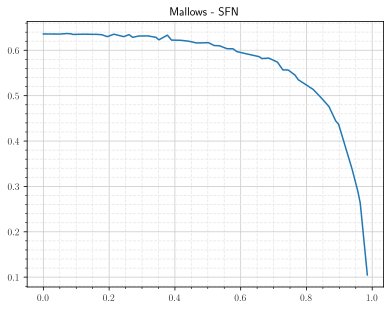

In [55]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

plt.rcParams['text.usetex'] = True

plt.figure() # (figsize=(16, 6))
plt.title('Mallows - SFN')
# plt.plot(np.arange(0.05, 1.01, 0.05), clf_KT_corr1)
plt.plot(sorted(alphas), [x for _, x in sorted(zip(alphas, clf_KT_corr3))])
# plt.legend([
#   'Mallows',
#   'Gaussian',
#   ],
#   fontsize=12
# )
plt.grid(visible=True, which='major', color='0.8', linestyle='-')
plt.grid(visible=True, which='minor', color='0.9', linestyle='--')
plt.minorticks_on()
plt.show()